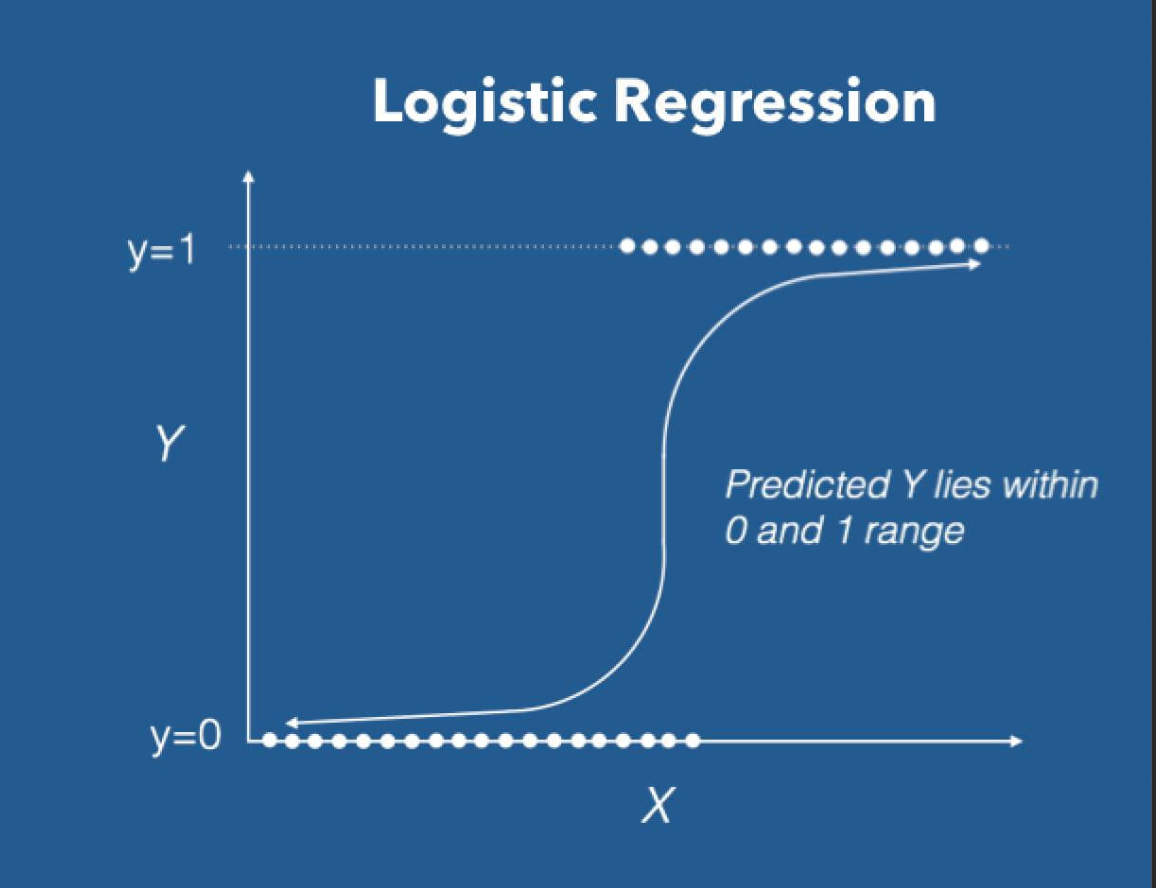

# 1- Understanding and Cleaning data

**We should understand and clean data frame before creating ML model**

**we imported libraries to help us ..**

In [1]:
# !pip install statsmodels

In [2]:
# dealing with data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

path = 'D:\\WORK Space\\My Portfolio\\Linear Model Docs\\Data\\Logistic Regression DATASET\\Social_Network_Ads.csv'

df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Now, we has found five columns 

* User ID: numuric values
* Gender: (Male/Female)
* Age: numuric values
* EstimatedSalary: numuric values
* Purchased: (0/1)

    **Note: When we say 1 means True and 0 means False**

From this columns we almost understand data set 

**[ The first four columns reasons (X) and 'Purchased' is result (y) ]**

**Let's clean data from missing data if found.**

In [3]:
print("Number of missing data in every columns: ")
df.isna().sum()

Number of missing data in every columns: 


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**No missing values, it's fine.**

**Let's clean data from duplicated rows if found.**
> This causes an overfit problem. this means model totally save data set and any new data model could NOT predicted accurately [For imaging not scientific definition]

In [4]:
print("Number of duplicated data in every columns: ",df.duplicated().sum())

Number of duplicated data in every columns:  0


**No duplicated rows, it's fine.**

# 2- Describing and Ploting

**Summary statistics**

In [5]:
df = df[['Age','EstimatedSalary','Purchased']]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


**Plot ['Age','EstimatedSalary'] and ['Purchased']**

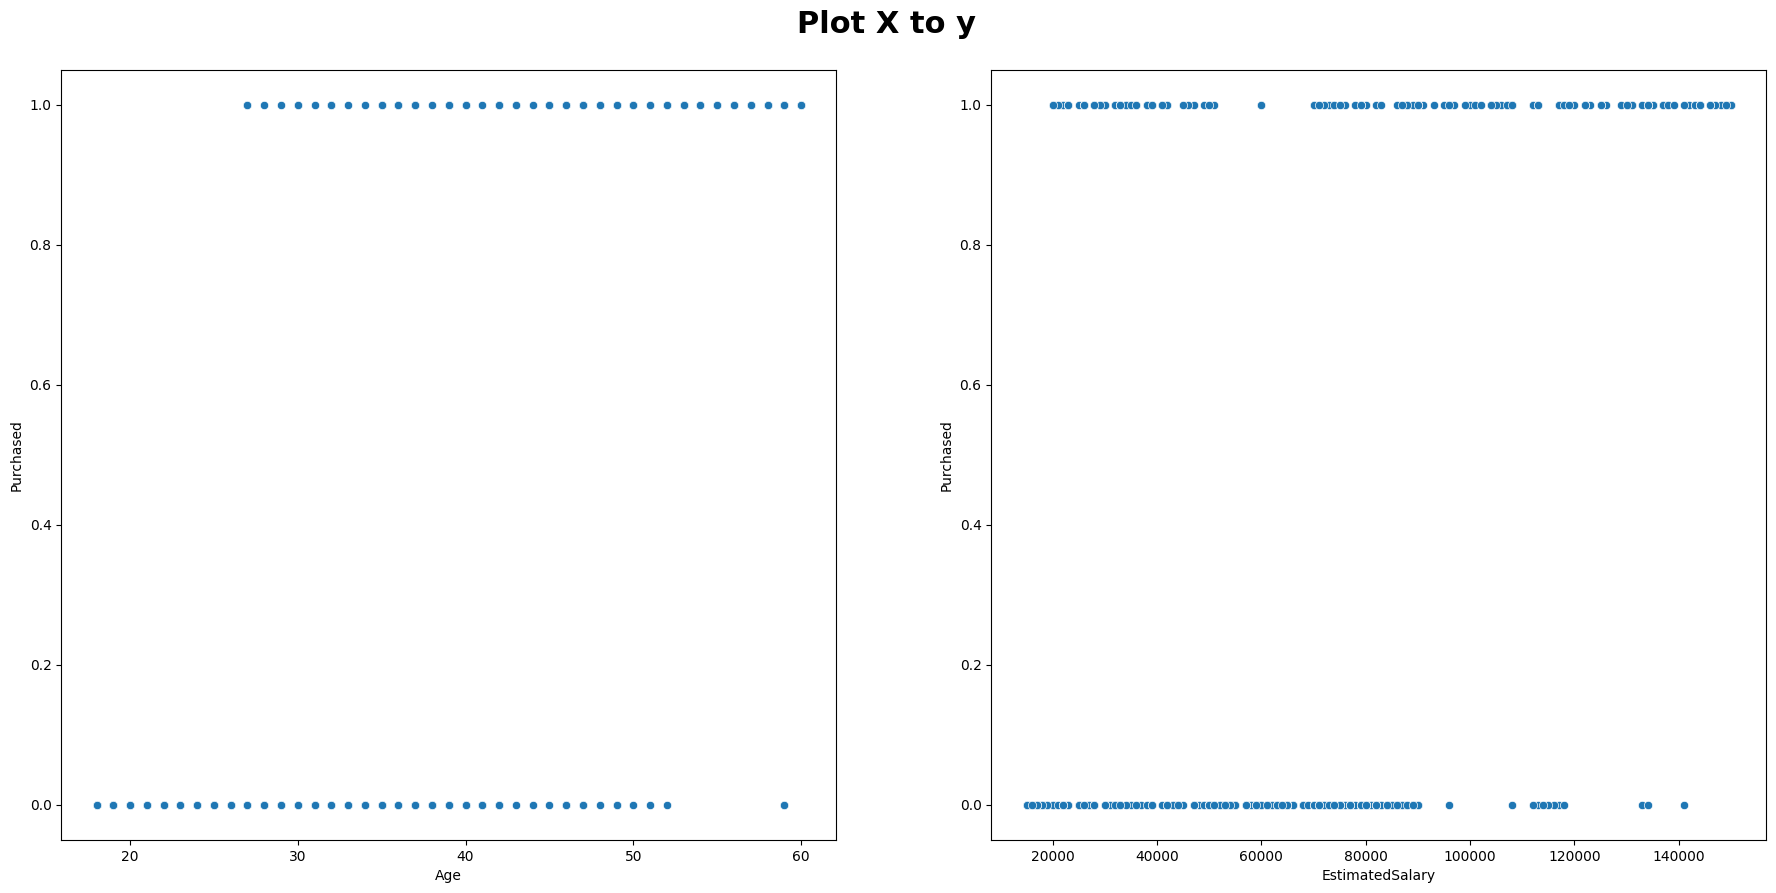

In [6]:
fig = plt.figure(figsize=(22,10))
gs  = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle(t='Plot X to y',y=0.94, fontweight ="bold",fontsize=22)
sns.scatterplot(ax=ax1,data=df,x='Age',y='Purchased')
sns.scatterplot(ax=ax2,data=df,x='EstimatedSalary', y='Purchased')

plt.show()

**This is graph to ease imagine our data**

**NOW, Let's see distribution of data**

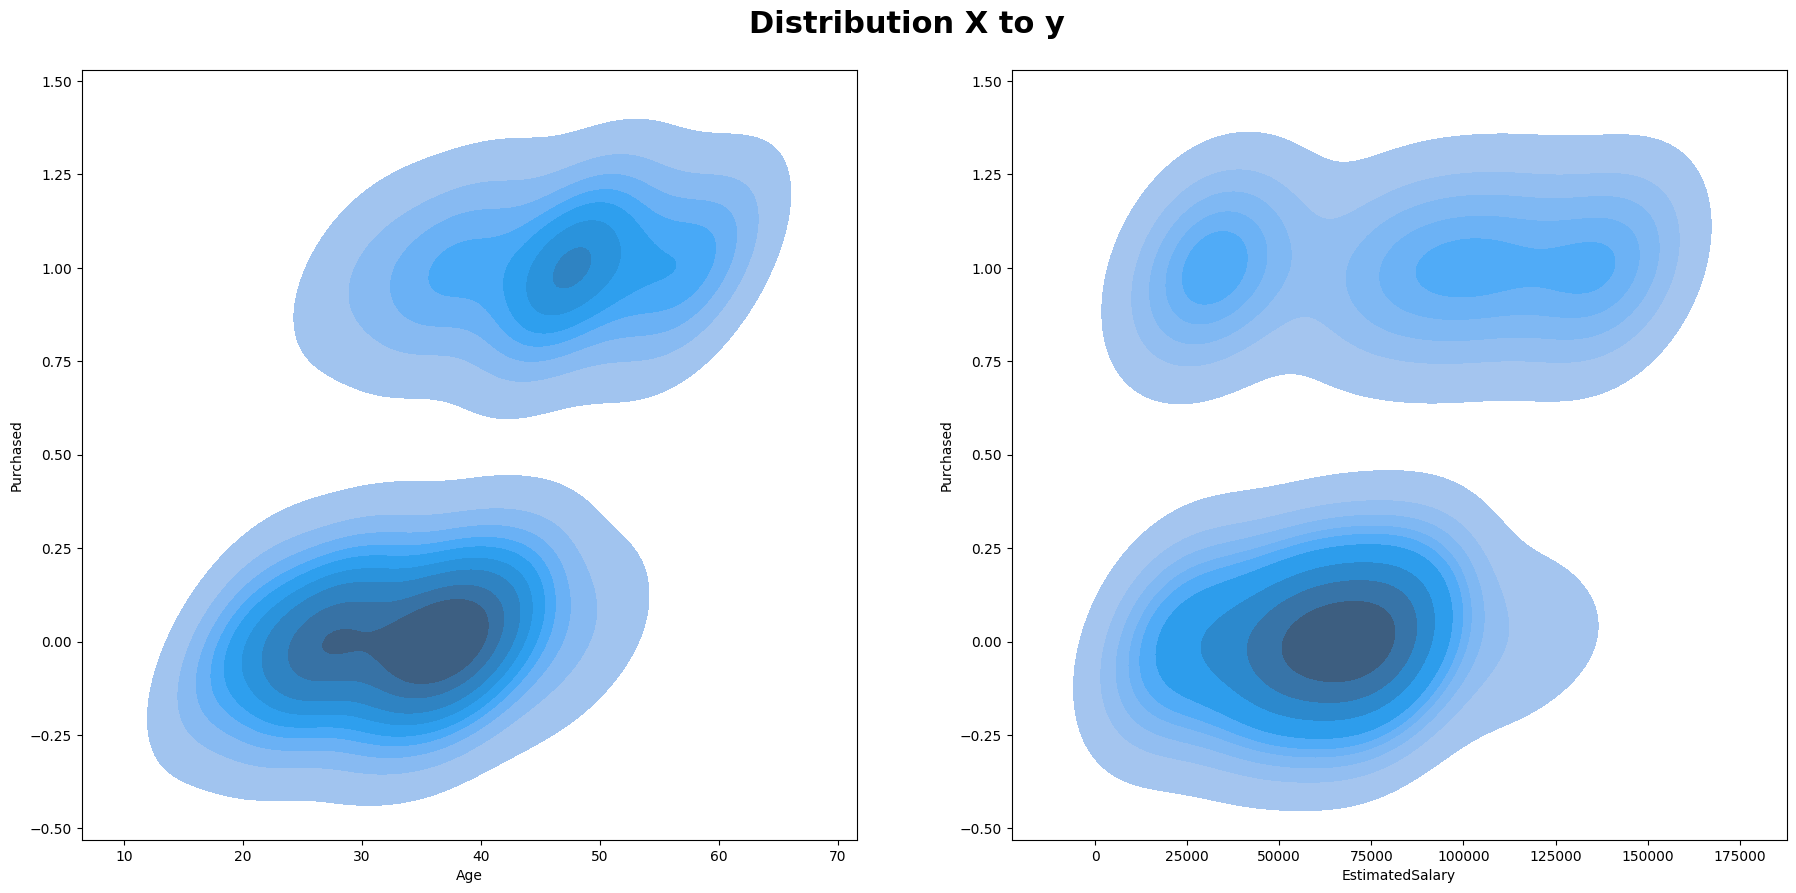

In [7]:
fig = plt.figure(figsize=(22,10))
gs  = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle(t='Distribution X to y',y=0.94, fontweight ="bold",fontsize=22)
sns.kdeplot(ax=ax1,data=df,x='Age',y='Purchased',fill=True)
sns.kdeplot(ax=ax2,data=df,x='EstimatedSalary', y='Purchased',fill=True)

plt.show()

**The data is divided into approximately two groups..**

This help us to choose model of ML, in this case Logistic regression **[Classification Model]** will fit our data..



**Before Creating model let's esimate Correlation between x and y**

> **Linear Correlation**
> 
> The purpose of linear correlation is to measure the proximity of a mathematical relationship between the variables of a dataset to a linear function.
> 
> If the relationship between the two variables is found to be closer to a linear function, then they have a stronger linear correlation and the absolute value of the correlation coefficient is higher.

In [8]:
corr_rounded = abs(round(df.corr()['Purchased']*100, 2))[:-1]
print(f"Correlation in (%) (Pearson's Method)\n{corr_rounded}")

Correlation in (%) (Pearson's Method)
Age                62.25
EstimatedSalary    36.21
Name: Purchased, dtype: float64


user ID didn't corrlate to Purchased So we considered X **[Age 62% EstimatedSalary 36%]**

**we separate columns to deal with them**

In [9]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

# **3- Logistic Regression in details**

***What is logistic regression?***

> This type of statistical model is often used for classification and predictive analytics. 
 Logistic regression estimates the probability(P) of an event occurring 
>
>  **if P < 50% then result = 0[False] else if P >= 50% then result = 1[True]**.

let's understand in our data set we have X[features] lead to y[target], if purchased[1] or not[0]we tried to build model in our data with some records and its result whether person purchased or not, to predict new records ,,


**NOTE: that part in knowledge is very important to know the field side before building ML model.**

***Hypothesis function for Logistic Regression :***

> The hypothesis in logistic regression can be defined as Sigmoid function. This is called as Logistic function as well. Logistic function is expected to output 0 or 1. But linear function can output less than 0 or more than 1. So, we cannot use the linear regression hypothesis. Logistic regression hypothesis can be expressed as follows: 

**Sigmoid Function**


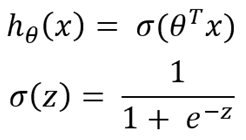

**Consider Z [matrics representation]**

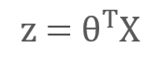

# 4- Data Pre-Processing [Data Scaling]

> Data Scaling is a data preprocessing step for numerical features. Many machine learning algorithms like Gradient descent methods,linear and logistic regression, etc. require data scaling to produce good results. Various scalers are defined for this purpose. 

***We have two methods***
* **Standard Scaler** helps to get standardized distribution, with a zero mean and standard deviation of one **[commonly use]**

    ***FORMULE:*** 
    
    new_X = (X - mean) / std
    
    
* **Min-Max scaler** is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one.

***The Goal:***

To minimize range between minimum and maximum value in each feature [column] to make all features in same range [between -1 to 1]

***Why Data Scaling ?***

Let's see in real example how can Scaling make a good predictive model in our data
we make two models, one with Scaling another without.

In [10]:
# LogisticRegression model in sklearn
from sklearn.linear_model import LogisticRegression

# StandardScaler method
from sklearn.preprocessing import StandardScaler

model_without_Scaling = LogisticRegression().fit(X, y)

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

model_with_Scaling = LogisticRegression().fit(X_scaled, y)

print(f'Score of model without Scaling: {round(model_without_Scaling.score(X, y)*100,1)}%')
print(f'Score of model with Scaling: {round(model_with_Scaling.score(X_scaled, y)*100)}%')

Score of model without Scaling: 64.2%
Score of model with Scaling: 84%


**YOU SEE, this is a big difference between model scores, so Data Scaling is important.**

# 5- Create ML model with sklearn


***Decision Boundary***

> A decision boundary is a line or surface that separates different regions in data space. It is used to make decisions about which class a new data point belongs to.
> 
> A decision boundary is used to separate training data into classes so that a classifier can learn to make predictions about new data.

***DecisionBoundaryDisplay***

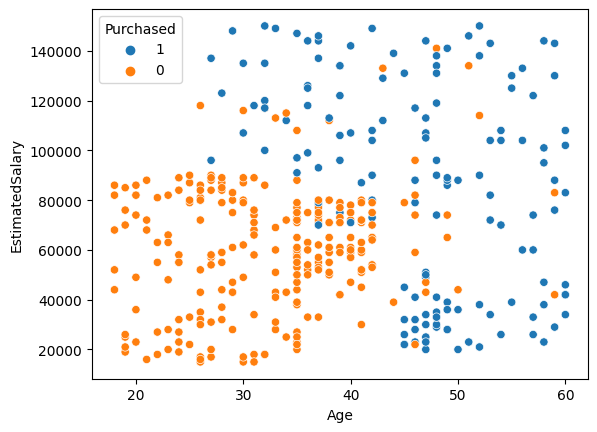

In [11]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased',hue_order=[1,0])

plt.show()

**Finding coefficients for logistic regression [Theta matrics] with sklearn**

In [12]:
from sklearn.linear_model import LogisticRegression

res = LogisticRegression().fit(X_scaled,y)

print(f"h(x) = {res.intercept_} + [{res.coef_[0][0]}] X1 + [{res.coef_[0][1]}] X2")

h(x) = [-1.08566951] + [2.265017499134798] X1 + [1.1335962319602912] X2


**Sigmoid function display**

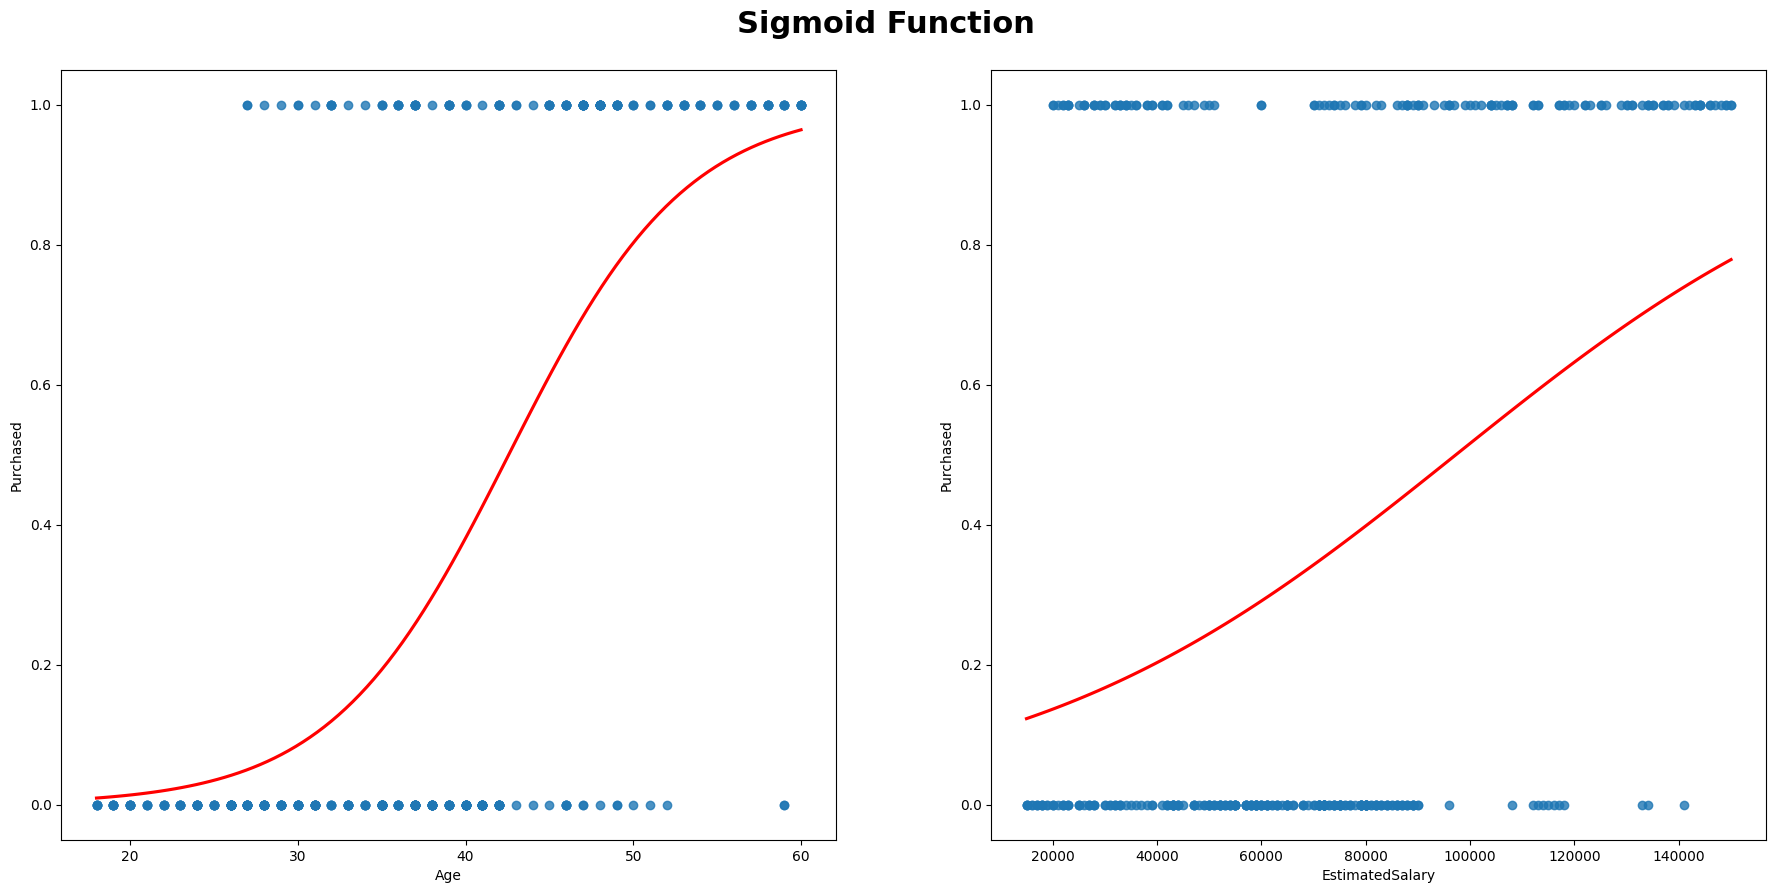

In [13]:
fig = plt.figure(figsize=(22,10))
fig.suptitle(t='Sigmoid Function',y=0.94, fontweight ="bold",fontsize=22)

gs  = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

sns.regplot(x='Age', y=y, data=df, logistic=True, ci=None,ax=ax1, line_kws={'color': 'red'})
sns.regplot(x='EstimatedSalary', y=y, data=df, logistic=True, ci=None, ax=ax2, line_kws={'color': 'red'})

plt.show()

**CREATE Linear Regression Model with sklearn..**


**we seperate data to train data 80% and test data 20% to score model and performance**

In [14]:
# Model
from sklearn.linear_model import LogisticRegression

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# 6- Scoring MODEL

In [15]:
print(f'Score TrainDataSet: {round(reg.score(x_train,y_train)*100,1)}%')
print(f'Score TestDataSet: {round(reg.score(x_test,y_test)*100,1)}%')

Score TrainDataSet: 84.1%
Score TestDataSet: 86.2%


**THANK YOU**


**if we help you, please upvote..**

# Refrence

**[IBM](https://www.ibm.com/topics/logistic-regression) for Definition**


**[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for code**


**[geeksforgeeks](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/) for Data Pre-Processing**